In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import re
import ast

In [2]:
csv_path = [
   "../../Raw_CSV/April 25-26 - 2022/Jobstreet/Jobstreet-sound-engineer.csv",
   "../../Raw_CSV/April 27 - 2022/Jobstreet/Jobstreet-sound-engineer.csv",
    "../../Raw_CSV/April 28 - 2022/Jobstreet/Jobstreet-sound-engineer.csv", 
]
merge = pd.concat(map(pd.read_csv,csv_path),ignore_index=True)
merge["Salary"].str.strip()
merge

,Title,Company,Location,Summary,Salary,Qualification & Skills,Role and Responsibilities,Job Type,Company Profile&Job Desc,Career Level,Benefits,Company Size
0,Site Engineer,ZUIDEN BUILDERS INC.,Muntinlupa City,"Bachelor's degree in engineering, construction...",None,"[""Bachelor's degree in engineering, constructi...",['The hirer is still in the process of verific...,['Full-Time'],"[""The hirer is still in the process of verific...",Less than 1 Year Experienced Employee,[],1 - 50 Employees
1,MECHANICAL ENGINEER (L1-L3) (KiwiRail),"21st Century Manpower Resources, Inc.",New Zealand,Work within the boundaries of your known and r...,None,['Work within the boundaries of your known and...,"['Job Responsibilities:', 'Job Qualifications:...",['Full-Time'],"[""Job Responsibilities:Work within the boundar...",1-4 Years Experienced Employee,['\n\t\t\tHealthcare Professionals such Physic...,1 - 50 Employees
2,Video Editor,Asticom Technology Inc,National Capital Reg,We are looking for 2 talented Video Editors to...,None,"[""We are looking for 2 talented Video Editors ...",[],"['Employment: Full Time /regular position', 'F...","[""Position: Video EditorLocation: BGC TaguigIn...",1-4 Years Experienced Employee,"['Dental, Education support, Miscellaneous all...",2001 - 5000 Employees
3,Maritime Engineer,"WSP Manila, Inc.",National Capital Reg,Leading design and planning works across vario...,None,['Leading design and planning works across var...,[],"['Full-Time', 'Average Processing Time']","[""WSP, a world leading management and consulta...",Supervisor/5 Years & Up Experienced Employee,"['Dental, Medical, Regular hours, Mondays - Fr...",201 - 500 Employees
4,Senior Designer (URGENT - WFH),Your Employee Offshore ( Yempo ) Inc.,National Capital Reg,None,"PHP 50,000 - PHP 65,000",[],[],"['Full-Time', 'Average Processing Time']",['We have an exciting opportunity available fo...,1-4 Years Experienced Employee,"['Dental, Medical, Vision, Regular hours, Mond...",51 - 200 Employees
...,...,...,...,...,...,...,...,...,...,...,...,...
66,MECHANICAL ENGINEER (L1-L3) (KiwiRail),"21st Century Manpower Resources, Inc.",New Zealand,Work within the boundaries of your known and r...,None,['Work within the boundaries of your known and...,"['Job Responsibilities:', 'Job Qualifications:...",['Full-Time'],"[""Job Responsibilities:Work within the boundar...",1-4 Years Experienced Employee,['\n\t\t\tHealthcare Professionals such Physic...,1 - 50 Employees
67,"Engineer 2, Power Systems","VERTIV (PHILIPPINES), INC",Philippines,1 year of professional experience in the field...,None,['1 year of professional experience in the fie...,"['Primary Duties and Responsibilities:', 'Coll...",[],['Primary Duties and Responsibilities:Collect ...,NaN,"['Dental, Medical, Regular hours, Mondays - Fr...",1001 - 2000 Employees
68,MECHANICAL ENGINEER (L1-L3) (KiwiRail),"21st Century Manpower Resources, Inc.",New Zealand,Work within the boundaries of your known and r...,None,['Work within the boundaries of your known and...,"['Job Responsibilities:', 'Job Qualifications:...",['Full-Time'],"[""Job Responsibilities:Work within the boundar...",1-4 Years Experienced Employee,['\n\t\t\tHealthcare Professionals such Physic...,1 - 50 Employees
69,Assistant Design Engineer - Structures,ARCADIS PHILIPPINES INC .,Makati City,Apply Arcadis Health and Safety Principles dur...,None,['Apply Arcadis Health and Safety Principles d...,"['JOB DESCRIPTION', 'At Arcadis we focus on at...",['Average Processing Time'],"[""JOB DESCRIPTIONAt Arcadis we focus on attrac...",Experienced in performing work per agreed budg...,[],1 - 50 Employees


In [3]:
merge

,Title,Company,Location,Summary,Salary,Qualification & Skills,Role and Responsibilities,Job Type,Company Profile&Job Desc,Career Level,Benefits,Company Size
0,Site Engineer,ZUIDEN BUILDERS INC.,Muntinlupa City,"Bachelor's degree in engineering, construction...",None,"[""Bachelor's degree in engineering, constructi...",['The hirer is still in the process of verific...,['Full-Time'],"[""The hirer is still in the process of verific...",Less than 1 Year Experienced Employee,[],1 - 50 Employees
1,MECHANICAL ENGINEER (L1-L3) (KiwiRail),"21st Century Manpower Resources, Inc.",New Zealand,Work within the boundaries of your known and r...,None,['Work within the boundaries of your known and...,"['Job Responsibilities:', 'Job Qualifications:...",['Full-Time'],"[""Job Responsibilities:Work within the boundar...",1-4 Years Experienced Employee,['\n\t\t\tHealthcare Professionals such Physic...,1 - 50 Employees
2,Video Editor,Asticom Technology Inc,National Capital Reg,We are looking for 2 talented Video Editors to...,None,"[""We are looking for 2 talented Video Editors ...",[],"['Employment: Full Time /regular position', 'F...","[""Position: Video EditorLocation: BGC TaguigIn...",1-4 Years Experienced Employee,"['Dental, Education support, Miscellaneous all...",2001 - 5000 Employees
3,Maritime Engineer,"WSP Manila, Inc.",National Capital Reg,Leading design and planning works across vario...,None,['Leading design and planning works across var...,[],"['Full-Time', 'Average Processing Time']","[""WSP, a world leading management and consulta...",Supervisor/5 Years & Up Experienced Employee,"['Dental, Medical, Regular hours, Mondays - Fr...",201 - 500 Employees
4,Senior Designer (URGENT - WFH),Your Employee Offshore ( Yempo ) Inc.,National Capital Reg,None,"PHP 50,000 - PHP 65,000",[],[],"['Full-Time', 'Average Processing Time']",['We have an exciting opportunity available fo...,1-4 Years Experienced Employee,"['Dental, Medical, Vision, Regular hours, Mond...",51 - 200 Employees
...,...,...,...,...,...,...,...,...,...,...,...,...
66,MECHANICAL ENGINEER (L1-L3) (KiwiRail),"21st Century Manpower Resources, Inc.",New Zealand,Work within the boundaries of your known and r...,None,['Work within the boundaries of your known and...,"['Job Responsibilities:', 'Job Qualifications:...",['Full-Time'],"[""Job Responsibilities:Work within the boundar...",1-4 Years Experienced Employee,['\n\t\t\tHealthcare Professionals such Physic...,1 - 50 Employees
67,"Engineer 2, Power Systems","VERTIV (PHILIPPINES), INC",Philippines,1 year of professional experience in the field...,None,['1 year of professional experience in the fie...,"['Primary Duties and Responsibilities:', 'Coll...",[],['Primary Duties and Responsibilities:Collect ...,NaN,"['Dental, Medical, Regular hours, Mondays - Fr...",1001 - 2000 Employees
68,MECHANICAL ENGINEER (L1-L3) (KiwiRail),"21st Century Manpower Resources, Inc.",New Zealand,Work within the boundaries of your known and r...,None,['Work within the boundaries of your known and...,"['Job Responsibilities:', 'Job Qualifications:...",['Full-Time'],"[""Job Responsibilities:Work within the boundar...",1-4 Years Experienced Employee,['\n\t\t\tHealthcare Professionals such Physic...,1 - 50 Employees
69,Assistant Design Engineer - Structures,ARCADIS PHILIPPINES INC .,Makati City,Apply Arcadis Health and Safety Principles dur...,None,['Apply Arcadis Health and Safety Principles d...,"['JOB DESCRIPTION', 'At Arcadis we focus on at...",['Average Processing Time'],"[""JOB DESCRIPTIONAt Arcadis we focus on attrac...",Experienced in performing work per agreed budg...,[],1 - 50 Employees


In [4]:
merge.describe()

,Title,Company,Location,Summary,Salary,Qualification & Skills,Role and Responsibilities,Job Type,Company Profile&Job Desc,Career Level,Benefits,Company Size
count,71,71,71,71,71,71,71,71,71,57,71,66
unique,15,17,13,17,4,17,12,6,18,4,11,6
top,Site Engineer,ZUIDEN BUILDERS INC.,National Capital Reg,"Bachelor's degree in engineering, construction...",None,"[""Bachelor's degree in engineering, constructi...",[],['Full-Time'],"[""The hirer is still in the process of verific...",1-4 Years Experienced Employee,[],1 - 50 Employees
freq,14,12,16,12,64,12,19,40,12,29,34,31


In [5]:
job_title_lower = merge["Title"].str.lower()

In [6]:
job_title = job_title_lower.value_counts()[0:10]

In [7]:
sort = job_title.sort_values()

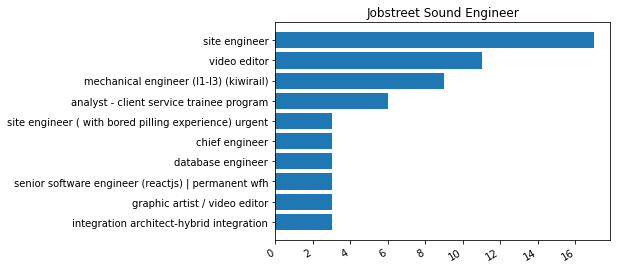

In [8]:
plt.barh(sort.index, sort.values)
plt.title("Jobstreet Sound Engineer")
plt.xticks(rotation="30", ha="right")
plt.show()

In [9]:
company_name = merge["Company"].value_counts()[0:10]

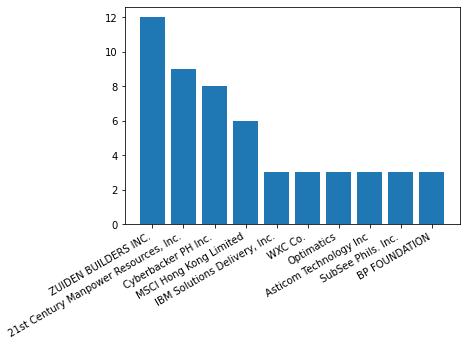

In [10]:
plt.bar(company_name.index, company_name.values)
plt.xticks(rotation="30", ha="right")
plt.show()

In [11]:
company_location = merge["Location"].value_counts()[0:10]

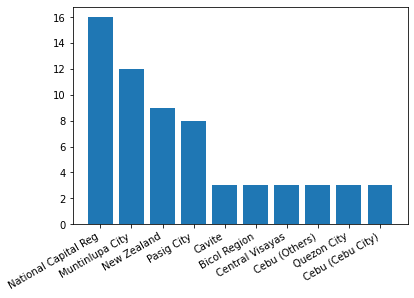

In [12]:
plt.bar(company_location.index, company_location.values)
plt.xticks(rotation="30", ha="right")
plt.show()


In [13]:
filt = (merge["Salary"] != "None")
results = merge.loc[filt]

In [14]:
salary = results["Salary"].value_counts()[0:10]

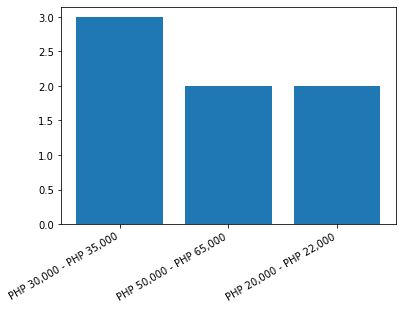

In [15]:
plt.bar(salary.index, salary.values)
plt.xticks(rotation="30", ha="right")
plt.show()

In [16]:
job_type = merge["Job Type"].apply(ast.literal_eval)
job_type_append = []
for i in job_type:
    job_type_append.append(job_type[0][0])

In [17]:
# List to Dataframe ( Count Job Type )
job_type_df = pd.DataFrame(job_type_append,columns=["Job Type"])
job_type_df.value_counts()


Job Type 
Full-Time    71
dtype: int64

In [18]:
career_level = merge["Career Level"]
count_career_level = career_level.value_counts()
count_career_level

1-4 Years Experienced Employee                                                            29
Less than 1 Year Experienced Employee                                                     19
Supervisor/5 Years & Up Experienced Employee                                               5
Experienced in performing work per agreed budget and schedule with limited supervision     4
Name: Career Level, dtype: int64

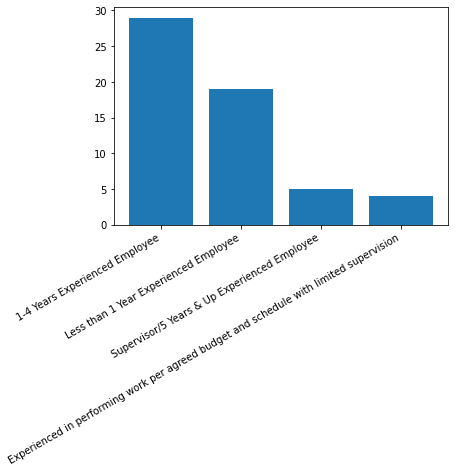

In [19]:
plt.bar(count_career_level.index, count_career_level.values)
plt.xticks(rotation="30",ha="right")
plt.show()

In [20]:
company_size = merge["Company Size"]
count_company_size = company_size.value_counts()[0:6]
count_company_size

1 - 50 Employees         31
201 - 500 Employees      13
51 - 200 Employees       13
2001 - 5000 Employees     3
None                      3
1001 - 2000 Employees     3
Name: Company Size, dtype: int64

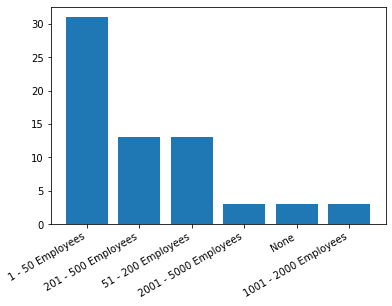

In [21]:
plt.bar(count_company_size.index, count_company_size.values)
plt.xticks(rotation="30",ha="right")
plt.show()

In [22]:
benefits = merge["Benefits"].str.replace("^\['|'\]$","")
benefits_append = []
split_benefits = benefits.str.split(",")

for i in range(len(split_benefits)):
    for j in split_benefits[i]:
        benefits_append.append(j)


/var/folders/tc/qdg72rpx523gjsqcr2vf_0c00000gn/T/ipykernel_2240/2971443327.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  benefits = merge["Benefits"].str.replace("^\['|'\]$","")


In [23]:
benefits_df = pd.DataFrame(benefits_append, columns=["Benefits"])
benefits_df = benefits_df["Benefits"].str.strip()
filt = (benefits_df != "[]")
benefits_df = benefits_df.loc[filt]
benefits_count = benefits_df.value_counts()[0:15]
benefits_count



Medical                                             28
Dental                                              22
Regular hours                                       16
Mondays - Fridays                                   16
Miscellaneous allowance                             15
Education support                                   12
Dentists                                             9
Loans                                                9
\n\t\t\tHealthcare Professionals such Physicians     9
'\n\t\t\tMedical Examination                         9
Pharmacists                                          9
Radiologic Technicians                               9
Medical Technologists                                9
Physical and Occupational Therapists                 9
etc.'                                                9
Name: Benefits, dtype: int64

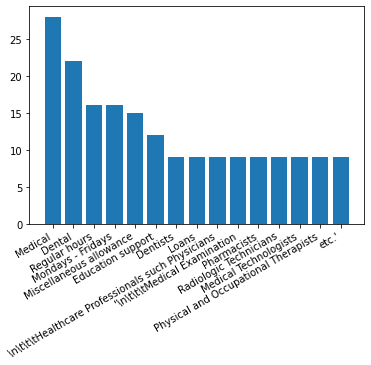

In [24]:
plt.bar(benefits_count.index, benefits_count.values)
plt.xticks(rotation="30",ha="right")
plt.show()

In [25]:
filt = (merge["Salary"] != "None")
salary_career_level = merge[filt].sort_values(by="Salary",ascending=True)
count = salary_career_level[["Title","Salary","Career Level"]]



In [26]:
merge["Career Level"].value_counts()

1-4 Years Experienced Employee                                                            29
Less than 1 Year Experienced Employee                                                     19
Supervisor/5 Years & Up Experienced Employee                                               5
Experienced in performing work per agreed budget and schedule with limited supervision     4
Name: Career Level, dtype: int64

In [27]:
salary_append = []
merge = merge.loc[merge["Salary"] != "None"]
merge["Salary"] = merge["Salary"].str.replace(",", "")
merge["Salary"] = merge["Salary"].str.replace("PHP", "")
merge["Salary"] = merge["Salary"].str.replace("-", "")
merge["Salary"] = merge["Salary"].str.split("  ")


/var/folders/tc/qdg72rpx523gjsqcr2vf_0c00000gn/T/ipykernel_2240/1619117618.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merge["Salary"] = merge["Salary"].str.replace(",", "")
/var/folders/tc/qdg72rpx523gjsqcr2vf_0c00000gn/T/ipykernel_2240/1619117618.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merge["Salary"] = merge["Salary"].str.replace("PHP", "")
/var/folders/tc/qdg72rpx523gjsqcr2vf_0c00000gn/T/ipykernel_2240/1619117618.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of

In [28]:
mid_append = []
mid_level = merge.loc[merge["Career Level"] == "1-4 Years Experienced Employee"]
mid_level_salary = mid_level[mid_level["Salary"] != "None"]
count_mid = mid_level_salary["Salary"]
df_mid = count_mid.reset_index()
df_mid = df_mid.drop(columns="index")

for i in range(len(df_mid)):
    salary = df_mid["Salary"][i]
    for j in range(len(salary)):
        mid_append.append(int(salary[j]))

In [29]:
low_append = []
low_level = merge.loc[merge["Career Level"] == "Less than 1 Year Experienced Employee"]
low_level_salary = low_level[low_level["Salary"] != "None"]
count_low = low_level_salary["Salary"]
df_low = count_low.reset_index()
df_low = df_low.drop(columns="index")

for i in range(len(df_low)):
    salary = df_low["Salary"][i]
    for j in range(len(salary)):
        low_append.append(int(salary[j]))

In [30]:
high_append = []
high_level = merge.loc[merge["Career Level"] == "Supervisor/5 Years & Up Experienced Employee"]
high_level_salary = high_level[high_level["Salary"] != "None"]
count_high = high_level_salary["Salary"]
df_high = count_high.reset_index()
df_high = df_high.drop(columns="index")

for i in range(len(df_high)):
    salary = df_high["Salary"][i]
    for j in range(len(salary)):
        high_append.append(int(salary[j]))



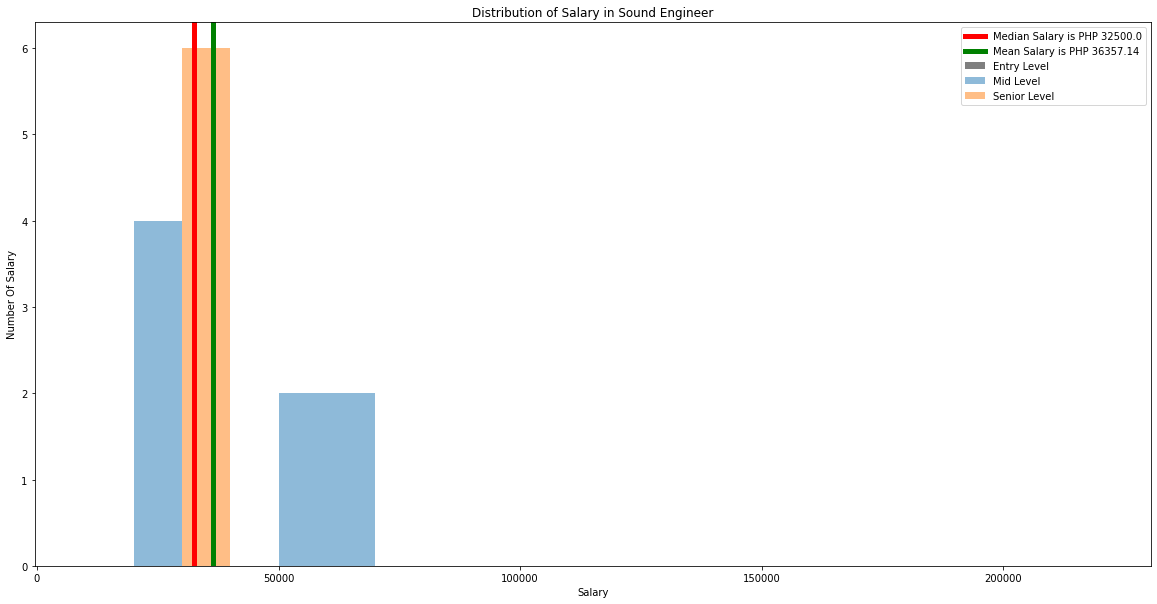

In [31]:
combine_salary = low_append + mid_append + high_append
df_combine_salary = pd.DataFrame(combine_salary, columns=["Combine Salary"])

bins = [10000,20000,30000,40000,50000,60000,70000,80000,90000,100000,110000,120000,130000,140000,150000,160000,170000,180000,190000,200000,210000,220000]
plt.figure(figsize=(20,10))
plt.hist(low_append,bins=bins,alpha = 0.5,color="black")
plt.hist(mid_append,bins=bins,alpha = 0.5)
plt.hist(high_append,bins=bins,alpha = 0.5)
plt.ylabel("Number Of Salary")
plt.xlabel("Salary")
plt.title("Distribution of Salary in Sound Engineer")
plt.axvline(df_combine_salary["Combine Salary"].median(), linewidth=5,color="red", label="Median Salary is PHP {}".format(df_combine_salary["Combine Salary"].median()))
plt.axvline(df_combine_salary["Combine Salary"].mean(), linewidth=5,color="green", label="Mean Salary is PHP {}".format(df_combine_salary["Combine Salary"].mean()))

plt.legend(["Median Salary is PHP {}".format(df_combine_salary["Combine Salary"].median()),"Mean Salary is PHP {}".format(round(df_combine_salary["Combine Salary"].mean(),2)),'Entry Level', 'Mid Level', 'Senior Level',])
